In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.sparse as sp

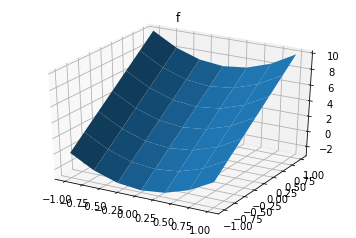

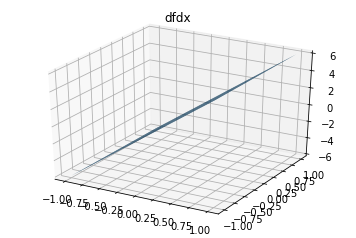

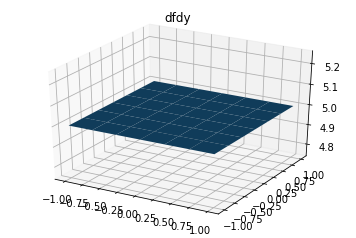

In [33]:
L = 2
N = 7
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
X,Y = np.meshgrid(x,y)


f = lambda x,y: 3*x**2 + 5*y + 2
dfdx = lambda x,y: 6*x + 0*y
dfdy = lambda x,y: 0*x + 0*y + 5

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,f(X,Y))
ax.set_title("f")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,dfdx(X,Y))
ax.set_title("dfdx")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,dfdy(X,Y))
ax.set_title("dfdy")
plt.show()

In [34]:
def mp_matrix(N):
    h = 1/N
    diag0 = np.repeat([0],N); diag0[0] = -1; diag0[-1] = 1
    diag1 = np.repeat([0.5],N-1); diag1[0] = 1
    diagm1 = np.repeat([-0.5],N-1); diagm1[-1] = -1
    A_mp = sp.diags((diag0, diag1, diagm1),[0,1,-1])
    return A_mp
    return (1/h)*A_mp

def DX(N):
    mp_block = mp_matrix(N)
    DX = sp.block_diag([mp_block.todense()]*N)
    return DX

In [82]:
def DY(N):
    data = np.concatenate([[-1,1],[-0.5,0.5]*(N-2),[-1,1]])
    iidx = np.repeat([N*i for i in range(0,N)],2)
    j_middle = np.concatenate([[N*i,N*(i+2)] for i in range(0,N-2)])
    jidx = np.concatenate([[0,N],j_middle,[N*(N-2),N*(N-1)]])
    
    joined_iidx = np.concatenate([iidx + np.ones(2*N)*n for n in range(N)])
    joined_jidx = np.concatenate([jidx + np.ones(2*N)*n for n in range(N)])
    joined_data = np.tile(data,N)

    DY = sp.coo_matrix((joined_data,(joined_iidx,joined_jidx)))
    return -1*DY

In [83]:
def platt(gittermatrix):
    return np.flip(gittermatrix,0).ravel()

def stapel(gittervektor):
    N = int(np.sqrt(gittervektor.size))
    return np.flip(gittervektor.reshape(N,N),0)

dfdx = 
 [[-4. -2.  2.  4.]
 [-4. -2.  2.  4.]
 [-4. -2.  2.  4.]
 [-4. -2.  2.  4.]]
dfdy = 
 [[ 5.  5.  5.  5.]
 [ 5.  5.  5.  5.]
 [ 5.  5.  5.  5.]
 [ 5.  5.  5.  5.]]


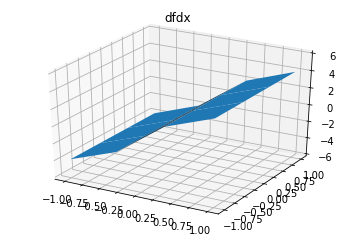

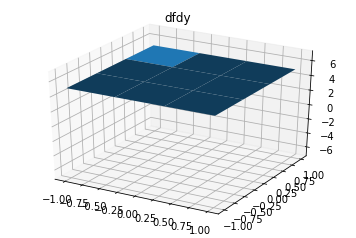

In [84]:
L = 2
N = 4
h = L/(N-1)
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
X,Y = np.meshgrid(x,y)

f = lambda x,y: 3*x**2 + 5*y + 2

dfdx = stapel((1/h)*DX(N).dot(platt(f(X,Y))))
dfdy = stapel((1/h)*DY(N).dot(platt(f(X,Y))))

print('dfdx = \n', dfdx)
print('dfdy = \n',dfdy)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,dfdx)
ax.set_title("dfdx")
ax.set_zbound(-6,6)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,dfdy)
ax.set_title("dfdy")
ax.set_zbound(-7,7)
plt.show()

In [85]:
F = f(X,Y)
fF = platt(F)
print("F\n", F)
print("fF\n",fF)
print("DY\n",DY(4).todense())

F
 [[  0.          -2.66666667  -2.66666667   0.        ]
 [  3.33333333   0.66666667   0.66666667   3.33333333]
 [  6.66666667   4.           4.           6.66666667]
 [ 10.           7.33333333   7.33333333  10.        ]]
fF
 [ 10.           7.33333333   7.33333333  10.           6.66666667   4.           4.
   6.66666667   3.33333333   0.66666667   0.66666667   3.33333333   0.
  -2.66666667  -2.66666667   0.        ]
DY
 [[ 1.   0.   0.   0.  -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   1.   0.   0.   0.  -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   1.   0.   0.   0.  -1.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   1.   0.   0.   0.  -1.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.5  0.   0.   0.   0.   0.   0.   0.  -0.5  0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.5  0.   0.   0.   0.   0.   0.   0.  -0.5  0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.5  0.   0.   0.   0.   0.   0.   0.  -0.5  0.   0.   

In [81]:
(1/h)*DY(4).dot(fF)

array([-5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5.,
       -5., -5., -5.])

In [79]:
1/h

1.5